# TASK-1
# MOVIE GENRE CLASSIFICATION

# Installing necessary libraries

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install sklearn

# Import libraries

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv("C:\\Users\\mohan\\Downloads\\CodeTech Internship\\moviegenre.csv")

In [5]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [8]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [9]:
print(df['Genre'].isnull().sum())

0


In [10]:
# Map genres to numerical labels
genre_mapping = {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Biography': 3, 'Comedy': 4,
                 'Crime': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9,
                 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Sci-Fi': 14,
                 'Sport': 15, 'Thriller': 16, 'War': 17, 'Western': 18}
df['Genre'] = df['Genre'].map(genre_mapping)


In [11]:
df = df.dropna(subset=['Series_Title', 'Genre'])
X_train, X_test, y_train, y_test = train_test_split(df['Series_Title'], df['Genre'], test_size=0.2, random_state=42)


In [12]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [13]:
# Train a Support Vector Machine classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)

SVC()

In [14]:
# Predictions
svm_predictions = svm_classifier.predict(X_test_tfidf)

In [15]:
# Evaluate Support Vector Machine classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("Classification Report (SVM):\n", classification_report(y_test, svm_predictions))

SVM Accuracy: 0.9523809523809523
Classification Report (SVM):
               precision    recall  f1-score   support

         6.0       0.95      1.00      0.98        20
        10.0       0.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.48      0.50      0.49        21
weighted avg       0.91      0.95      0.93        21



C:\Users\mohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mohan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


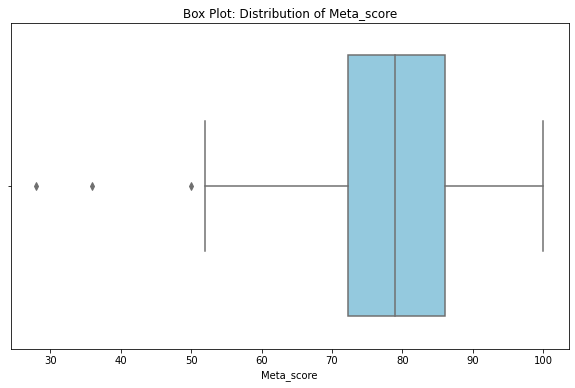

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Meta_score', data=df, color='skyblue')
plt.title("Box Plot: Distribution of Meta_score")
plt.xlabel("Meta_score")
plt.show()

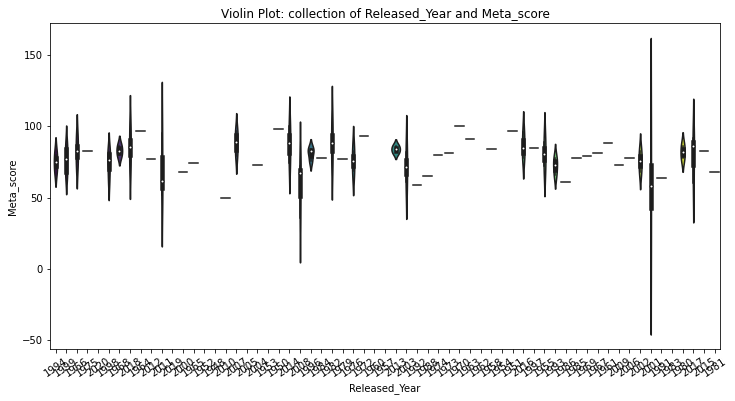

In [17]:
# Violin plot to compare distribution of movie durations across different genres
plt.figure(figsize=(12, 6))
sns.violinplot(x='Released_Year', y='Meta_score', data=df, palette='viridis')
plt.title("Violin Plot: collection of Released_Year and Meta_score")
plt.xlabel("Released_Year")
plt.ylabel("Meta_score")
plt.xticks(rotation=34)
plt.show()

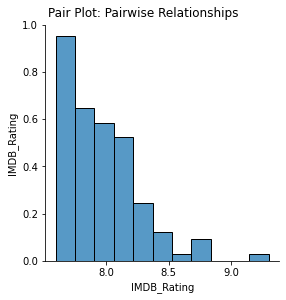

In [18]:
# Pair plot to visualize pairwise relationships between numerical variables
sns.pairplot(df[['Runtime', 'IMDB_Rating']], height=4)
plt.suptitle("Pair Plot: Pairwise Relationships", y=1.02)
plt.show()

Text(0, 0.5, 'Gross')

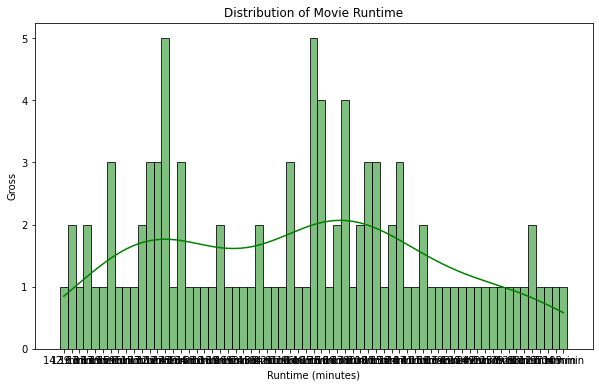

In [19]:
# Create a histogram for the distribution of movie durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Runtime'], bins=30, kde=True, color='green', edgecolor='black')
plt.title("Distribution of Movie Runtime")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Gross")

In [21]:
df = pd.read_csv("C:\\Users\\mohan\\Downloads\\CodeTech Internship\\moviegenre.csv", usecols=['Runtime', 'Gross'],nrows=20)

In [22]:
df

,Runtime,Gross
0,142 min,"28,341,469"
1,175 min,"134,966,411"
2,152 min,"534,858,444"
3,202 min,"57,300,000"
4,96 min,"4,360,000"
5,201 min,"377,845,905"
6,154 min,"107,928,762"
7,195 min,"96,898,818"
8,148 min,"292,576,195"
9,139 min,"37,030,102"


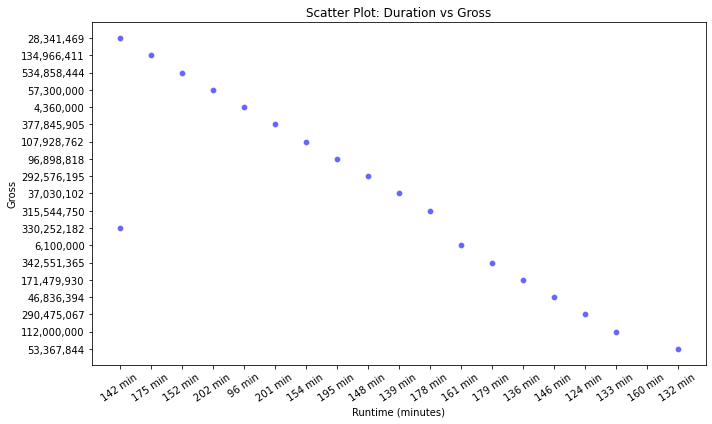

In [23]:
# Create a scatter plot for 'Runtime' vs 'Gross'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='Gross',data=df, color='blue', alpha=0.6)
plt.title("Scatter Plot: Duration vs Gross")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Gross")
plt.xticks(rotation=34)
plt.tight_layout()
plt.show()